In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd

In [4]:
# Load the data
file_path = Path("../Resources/Source_data/FW_Veg_Rem_Combined.csv")
fires_df = pd.read_csv(file_path)
fires_df = fires_df[["fire_size","fire_size_class","state","Vegetation","Temp_pre_30","Temp_pre_15","Temp_pre_7","Temp_cont","Wind_pre_30","Wind_pre_15","Wind_pre_7","Wind_cont","Hum_pre_30","Hum_pre_15","Hum_pre_7","Hum_cont","Prec_pre_30","Prec_pre_15","Prec_pre_7","Prec_cont","remoteness"]].copy()
fires_df = fires_df[fires_df["state"]=="CA"]
fires_df = fires_df[fires_df["Temp_pre_30"]>0]
fires_df = fires_df[fires_df["Temp_pre_15"]>0]
fires_df = fires_df[fires_df["Temp_pre_7"]>0]
fires_df = fires_df[fires_df["Temp_cont"]>0]
fires_df = fires_df[fires_df["Wind_pre_30"]>0]
fires_df = fires_df[fires_df["Wind_pre_15"]>0]
fires_df = fires_df[fires_df["Wind_pre_7"]>0]
fires_df = fires_df[fires_df["Wind_cont"]>0]
fires_df = fires_df[fires_df["Hum_pre_30"]>0]
fires_df = fires_df[fires_df["Hum_pre_15"]>0]
fires_df = fires_df[fires_df["Hum_pre_7"]>0]
fires_df = fires_df[fires_df["Hum_cont"]>0]
fires_df = fires_df[fires_df["Prec_pre_30"]>-1]
fires_df = fires_df[fires_df["Prec_pre_15"]>-1]
fires_df = fires_df[fires_df["Prec_pre_7"]>-1]
fires_df = fires_df[fires_df["Prec_cont"]>-1]
fires_df.head(10)

,fire_size,fire_size_class,state,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
78,450.0,E,CA,16,27.850483,28.165097,28.499405,33.900000,2.580000,2.664543,...,2.237500,44.706207,42.983379,49.000000,39.375000,0.0,0.0,0.0,0.0,0.472150
88,3.0,B,CA,15,19.685119,19.242174,19.495294,19.063744,3.893413,3.755263,...,3.751422,67.688935,68.160550,64.461538,66.811705,0.0,0.0,0.0,0.0,0.501750
192,1.0,B,CA,14,11.748991,13.265223,15.781065,14.750000,1.548318,1.497429,...,1.102083,61.600837,60.522481,58.560897,62.888889,2.5,2.5,0.0,0.0,0.501108
274,1.3,B,CA,16,18.601678,17.351402,17.417453,13.176536,1.935570,2.238318,...,2.894382,58.164848,52.572127,50.336788,68.926554,0.0,0.0,0.0,27.9,0.461236
302,5.0,B,CA,12,17.951613,17.726636,18.071066,19.908578,2.254147,2.099766,...,1.995372,73.609502,74.295508,73.903553,79.306030,2.9,1.5,0.6,2.1,0.466788
309,2.0,B,CA,0,4.610849,5.639908,7.474468,8.600308,1.652524,1.367890,...,2.131963,72.852975,70.987654,76.985714,78.735746,12.2,3.8,3.8,49.1,0.499333
394,1.0,B,CA,0,16.092461,19.914530,21.184049,23.756098,3.233091,3.683086,...,4.056860,57.811463,45.103343,34.831081,43.171200,29.2,0.0,0.0,0.0,0.501295
436,1.0,B,CA,0,26.329749,28.340288,30.689062,28.071181,2.667626,2.358993,...,2.127778,33.115108,29.446043,27.703125,41.237762,0.0,0.0,0.0,0.0,0.497625
442,2.0,B,CA,0,22.488692,23.002949,20.030556,16.693987,2.714033,2.576944,...,2.174346,51.244202,50.099462,60.648045,55.608639,12.0,12.0,12.0,8.8,0.499643
453,1.0,B,CA,14,23.426667,27.206389,25.695833,26.551489,3.217222,2.839167,...,3.064965,43.815385,39.416667,42.446429,39.747518,21.0,0.0,0.0,3.0,0.520804


In [7]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X = fires_df["remoteness"].values.reshape(-1, 1)
y = fires_df["fire_size"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1810, 1) (1810, 1)


Text(0, 0.5, 'fire_size')

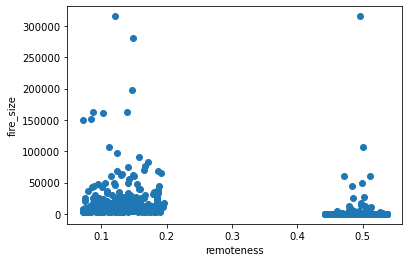

In [8]:
# Plot the data to find out if a linear trend exists

plt.scatter(X, y)
plt.xlabel("remoteness")
plt.ylabel("fire_size")

In [9]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)


In [10]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [11]:
# Fit the model to the training data. 

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.14139234577768012
Testing Score: 0.1790542079474


In [12]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# A good MSE score will be close to zero, while a good R2 score will be close to 1.
# R2 score is the default scoring for many of the Sklearn models

mean squared error (MSE): 309628646.2035853
R-squared (R2): 0.1790542079474


In [13]:
# Call the `score()` method on the model to show the R2 score

model.score(X_test, y_test)

0.1790542079474